In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import itertools
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import time
import xgboost
from xgboost import XGBClassifier
import time
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

using unigram features

In [0]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [0]:
# loading the cleaned training tweets
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)

In [0]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [8]:
# checking the shape of the output variable
y.shape

(99989,)

In [9]:
# checking the shape of the input matrix -- this is feed into the classifier for training
X.shape

(99989, 41679)

In [0]:
# splitting into training and testing set so as to evaluate our classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [0]:
i = 1
values_max_depth = []
while i<=10:
    model = XGBClassifier(max_depth = i)
    model.fit(X_train, y_train)
    values_max_depth.append(model.score(X_test, y_test))
    i = i +1

In [12]:
print(values_max_depth)

[0.6501650165016502, 0.6767676767676768, 0.6972197219721972, 0.7073207320732073, 0.7151215121512151, 0.7187718771877187, 0.7229222922292229, 0.7287228722872288, 0.7336733673367337, 0.7356235623562356]


In [0]:
i = 5
values_subsample = []
while i<=10:
    model = XGBClassifier(subsample = i/10)
    model.fit(X_train, y_train)
    values_subsample.append(model.score(X_test, y_test))
    i = i +1

In [17]:
print(values_subsample)

[0.697969796979698]


In [0]:
i = 5
values_colsample_bytree = []
while i<=10:
    model = XGBClassifier(colsample_bytree = i/10)
    model.fit(X_train, y_train)
    values_colsample_bytree.append(model.score(X_test, y_test))
    i = i +1

In [0]:
print(values_colsample_bytree)

[0.6934693469346934, 0.6957695769576958, 0.693969396939694, 0.6944194419441945, 0.6946694669466946, 0.6972197219721972]


In [0]:
model = XGBClassifier(seed = 0,verbose =1)

In [0]:
model = XGBClassifier(seed = 0,colsample_bytree = .6, max_depth = 10, subsample=.7,n_estimators = 2500)

In [20]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [21]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.6934693469346934

Confusion matrix, without normalization
[[3891 4891]
 [1239 9977]]
Normalized confusion matrix
[[0.44 0.56]
 [0.11 0.89]]


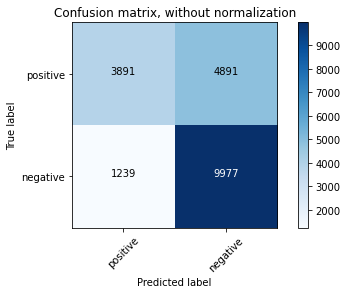

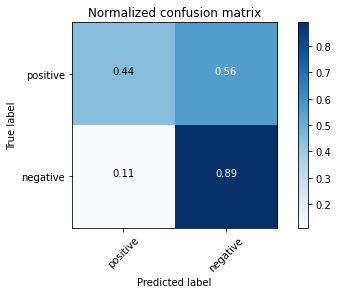

In [22]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
# finally loading the cleaned test tweets on which we have to do sentiment analysis and report to kaggle
with open('/content/drive/My Drive/a/sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X_test=vectorizer.transform(SentimentText)

In [0]:
# checking the shape
X_test.shape

(299989, 41679)

In [0]:
# predicting the sentiments using trained classifier
predicted = model.predict(X_test)

In [0]:
# shape of the predicted 
predicted.shape

(299989,)

In [0]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('/content/drive/My Drive/a/data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('/content/drive/My Drive/a/output/output.csv', index = False)

using bigram features

In [0]:
# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X=bigram_vectorizer.fit_transform(SentimentText)

In [0]:
train_data = pd.read_csv('data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [0]:
X.shape

(99989, 428766)

In [0]:
y.shape

(99989,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [0]:
model = XGBClassifier(seed = 0,colsample_bytree = .6, max_depth = 10, subsample=.7,n_estimators = 2500)

In [0]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7)

In [0]:

# training score
model.score(X_train, y_train)

In [0]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

Confusion matrix, without normalization
[[6166 2616]
 [1839 9377]]
Normalized confusion matrix
[[0.7  0.3 ]
 [0.16 0.84]]


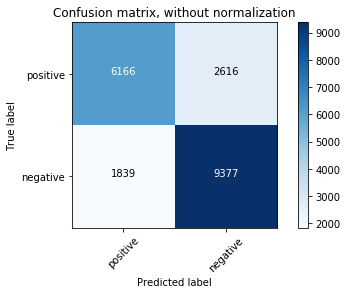

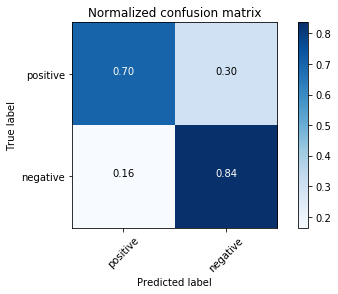

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_test.txt', 'rb') as f:

    SentimentText = pickle.load(f)

In [0]:
X_test=bigram_vectorizer.transform(SentimentText)

In [0]:
X_test.shape

(299989, 428766)

In [0]:
predicted = model.predict(X_test)

In [0]:
predicted.shape

(299989,)

In [0]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('/content/drive/My Drive/a/data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('/content/drive/My Drive/a/output2.csv', index = False)

using both unigrams and bigrams features

In [0]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

# #Finding the bigram representation 
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X_unigrams = vectorizer.fit_transform(SentimentText)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText)

In [0]:
X_unigrams.shape

(99989, 41679)

In [0]:
X_bigrams.shape

(99989, 428766)

In [0]:
from scipy.sparse import hstack 
X_combined = hstack([X_unigrams , X_bigrams])

In [0]:
X_combined.shape

(99989, 470445)

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/a/data/train.csv', encoding = 'ISO-8859-1')
y = train_data['Sentiment']

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,train_size = .8 , test_size = .2 , random_state = 0)

In [0]:
model = XGBClassifier(seed = 0,colsample_bytree = .6, max_depth = 10, subsample=.7,n_estimators = 2500)

In [0]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=2500,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.7)

In [0]:
# training score
model.score(X_train,y_train)

In [0]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

Confusion matrix, without normalization
[[6205 2577]
 [1847 9369]]
Normalized confusion matrix
[[0.71 0.29]
 [0.16 0.84]]


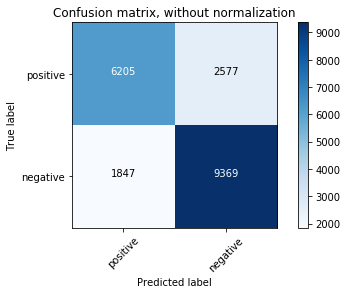

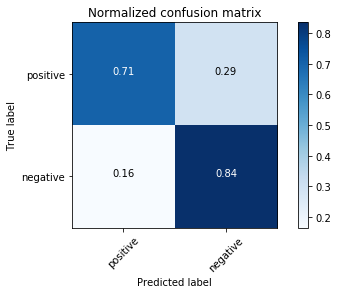

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [0]:
with open('/content/drive/My Drive/a/sentiments/SentimentText_test.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [0]:
X_test_unigrams = vectorizer.transform(SentimentText)
X_test_bigrams = bigram_vectorizer.transform(SentimentText)

In [0]:
X_test_unigrams.shape

(299989, 41679)

In [0]:
X_test_bigrams.shape

(299989, 428766)

In [0]:
from scipy.sparse import hstack 
X_test_combined = hstack([X_test_unigrams , X_test_bigrams])

In [0]:
X_test_combined.shape

(299989, 470445)

In [0]:
predicted = model.predict(X_test_combined)

In [0]:
# this code generates output csv on the test set which is submitted to the kaggle for score evaluation

output = pd.read_csv('/content/drive/My Drive/a/data/test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('/content/drive/My Drive/a/output3.csv', index = False)